import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08&9</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [4]:
df = df0.copy()

In [5]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [6]:
df.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [6]:
df.groupby("status", dropna=False).mean()

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [9]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [10]:
df.groupby("status").value_counts(dropna = False)

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59.0      1
        P008  F       FS    10    2.0   136.0     1
FT      P001  M       DS    2     8.0   NaN       1
        P004  F       AWS   nan   8.0   120.0     1
        P007  M       FS    nan   NaN   NaN       1
        P010  F       DS    -     7.0   125.0     1
PT      P002  F       FS    3     NaN   54.0      1
        P005  M       DS    7     11.0  58.0      1
        P006  F       NaN   1     NaN   75.0      1
        P009  M       NaN   14    3.0   60.0      1
dtype: int64

In [ ]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [11]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [13]:
type(df.var1[3])

str

In [14]:
type(df.var2[1])

numpy.float64

In [15]:
type(df.salary[6])

NoneType

In [17]:
type(np.nan)

float

In [18]:
type(None)

NoneType

In [19]:
pd.Series([1, np.nan, np.NaN, 2, None])

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

In [20]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)

nan
nan
nan
nan
nan


In [21]:
print(np.nan == np.nan)

False


In [22]:
print(10 > np.nan)

False


In [23]:
print(np.inf > np.nan)

False


In [25]:
print(float('-inf') < np.nan < float('inf')) 

False


In [24]:
print(np.nan is np.nan)

True


In [26]:
id(np.nan)

2541200247632

In [27]:
id(np.nan)

2541200247632

In [3]:
id(np.nan)

2198056264432

In [4]:
print(0.3 == 3 * 0.1)

False


**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [7]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [8]:
df.salary

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [10]:
df[["salary"]]

,salary
0,NaN
1,54
2,59
3,120
4,58
5,75
6,None
7,136
8,60
9,125


In [13]:
df.salary[0]

nan

In [18]:
type(df.salary[0])   #NaN

float

In [16]:
df.salary[6]

In [19]:
type(df.salary[6])

NoneType

In [17]:
df.salary[10]

nan

In [20]:
type(df.salary[10])

float

In [22]:
df.salary.dtype  #object

dtype('O')

In [23]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [24]:
df.status.dtype

dtype('O')

In [25]:
df.status[2]

'-'

In [26]:
type(df.status[2])

str

In [27]:
type(df.status[10])  #NaN flaot

float

In [28]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [29]:
df.var1.dtype

dtype('O')

In [30]:
type(df.var1[3])

str

In [31]:
type(df.var1[0])

str

In [32]:
type(df.var1[9])  # hepsi str bakınız. datayı tanımak burada önemli.

str

In [ ]:
#########################################################################################

In [33]:
df.info()  # null olmayanları tespit için önemli, ilk yapacağımız şey bu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [ ]:
# hemen bu değelerkeri kullanmıyoruzbir fikir veriyor

In [34]:
df.isnull()  # null mu değil mi?  true lar NaN

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [35]:
df.isna()   #isnull ile aynı   infonun df görünümü

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [36]:
pd.isnull == pd.isna  #eşit bunlar id leri aynı

True

In [37]:
id(pd.isnull)

3002928532064

In [38]:
id(pd.isna )       

3002928532064

In [ ]:
# neden iki farklı metod yapmışlar. R dilinde kullanılan metodlar.. R da farklılar.

In [39]:
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [40]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [42]:
df.isnull().any()  # true yazanlarda missing valule vardır diyeceğiz

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [43]:
df.any()  # 

id        True
gender    True
status    True
dept      True
var1      True
var2      True
salary    True
dtype: bool

In [44]:
df.any(axis=1) 

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool

In [46]:
df.isnull().sum()  # true ları toplar.

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [47]:
df.isnull().sum().sum()  # toplam missingi bulurum

9

In [48]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [49]:
df.salary.isnull().any()     #içinde var olduğu için true döndürdü.

True

In [50]:
df.salary.isnull().sum()  # 3adet

3

In [51]:
len(df)  #satır sayısı

11

In [52]:
(df.isnull().sum() / len(df))*100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [53]:
round((df.isnull().sum() / len(df))*100,2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [56]:
# len yerine 
((df.isnull().sum() / df.shape[0])*100).round(2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [57]:
df.isnull().any(axis=1)  #truelarda nulll var.

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [58]:
df[df.isnull().any(axis=1) ] # null olanları yani treu ları hemen alabiliriz.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [59]:
df[~df.isnull().any(axis=1) ]  # ~ tilde işaret tam tersini yapar.

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [60]:
df.isnull().all(axis=1)  # tamamı null olan var mı?

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [61]:
df.salary.isnull()

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [62]:
df.loc[df.salary.isnull()]   # salary sütünundaki nan ların olduğu satıları yazdırdk.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [68]:
df.loc[df.dept.isnull()][["salary"]]  # dept ı null olanların salary değerlerini istedik.

,salary
5,75
8,60


In [69]:
# hoca
df.dept=="FS"   # dept fs olanları aradık.

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
Name: dept, dtype: bool

In [70]:
df.loc[df.dept=="FS" ] # dept fs olanların olduğu tüm satırları

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [71]:
df.dept.isnull()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
Name: dept, dtype: bool

In [72]:
df.loc[df.dept.isnull()]  # bütün sutunları getirisi

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [73]:
df.loc[df.dept.isnull(),["salary"]]

,salary
5,75
8,60


In [74]:
df.loc[df.dept.isnull(),["id","salary"]]  # istersek diğer isteidğimiz sütünda böyle gelir.

,id,salary
5,P006,75
8,P009,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [75]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [76]:
# 9 satırda  bir - var. 
df["var1"].map({"-": np.nan})  
#dict te bir değeri değiştirmek istersek hepsini belirtmemiz lazım. 
# bu olmadı yani

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [83]:
df["var1"].replace({"-": np.nan})    # bak bu oldu.

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [78]:
text= "cl-rusw-y"

In [84]:
df.var1[9]

'-'

In [87]:
df["var1"].replace({"-": np.nan}).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

'-'

In [79]:
text.replace("-","a")

'clarusway'

In [80]:
#hoca
df["var1"].replace(to_replace="-",value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [81]:
df.var1[9]

'-'

In [82]:
type(df.var1[9])

str

In [86]:
#bunu nasıl çözecez ozaman. seri verdiği için astype kullanacağız..
df["var1"].replace(to_replace="-",value=np.nan).astype("float")
#bakınız diğer küçük nan lar bile NaN oldu.

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [89]:
df["var1"].replace(["-","nan"], np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [90]:
df["var1"].replace(["-","nan"], np.nan,inplace=True)

In [91]:
df.var1

0       2
1       3
2       5
3     NaN
4       7
5       1
6     NaN
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [92]:
df.status


0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [94]:
df["status"]=df["status"].replace("-",np.nan)
df.status

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [95]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,NaN,AWS,5,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
#içinde çok farklı bir değer olanda map kullanmak mantıklı değil.

In [96]:
df["gender"].map({"M":0,"F":1})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [97]:
df.gender  # kalıcı olmamış..

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

In [99]:
df["gender"].replace({"M":0,"F":1},inplace=True)
df.gender

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [ ]:
# yada 

In [104]:
df["gender"].replace(["M","F"],(0,1),inplace=True)
df.gender

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [103]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [105]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54
2,P003,0,NaN,AWS,5,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7,11.0,58
5,P006,1,PT,None,1,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10,2.0,136
8,P009,0,PT,NaN,14,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [106]:
df.dropna(axis=0,how ="any", thresh=None,inplace=False) # bunu fazla kullanmıyoruz

,id,gender,status,dept,var1,var2,salary
4,P005,0,PT,DS,7,11.0,58


In [107]:
df.dropna(axis=0,how ="all", thresh=None,inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54
2,P003,0,NaN,AWS,5,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7,11.0,58
5,P006,1,PT,None,1,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10,2.0,136
8,P009,0,PT,NaN,14,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [108]:
df["delete_me"]=np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,0,FT,DS,2,8.0,NaN,NaN
1,P002,1,PT,FS,3,NaN,54,NaN
2,P003,0,NaN,AWS,5,5.0,59,NaN
3,P004,1,FT,AWS,NaN,8.0,120,NaN
4,P005,0,PT,DS,7,11.0,58,NaN
5,P006,1,PT,None,1,NaN,75,NaN
6,P007,0,FT,FS,NaN,NaN,None,NaN
7,P008,1,NaN,FS,10,2.0,136,NaN
8,P009,0,PT,NaN,14,3.0,60,NaN
9,P010,1,FT,DS,NaN,7.0,125,NaN


In [109]:
df.dropna(axis=1,how ="all",inplace=True)  # eklediğimiz sütun düşüyor
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54
2,P003,0,NaN,AWS,5,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7,11.0,58
5,P006,1,PT,None,1,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10,2.0,136
8,P009,0,PT,NaN,14,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [112]:
df.dropna(axis=1, thresh=9,inplace=False) # how ve tresh aynı işi yapıyor gibi. 

,id,gender,dept
0,P001,0,DS
1,P002,1,FS
2,P003,0,AWS
3,P004,1,AWS
4,P005,0,DS
5,P006,1,None
6,P007,0,FS
7,P008,1,FS
8,P009,0,NaN
9,P010,1,DS


In [ ]:
# dropna ile veriler düşürülecek ya içinde 
#şu kadar değer varsa düşürme anlamında thresh ortaya çıkıyor.

In [ ]:
#thresh= nan olmayan değerleri sayar eğer girdiğimiz sayıdan fazla değer var ise sütunu atmaz.

* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [113]:
df.drop([1,3,5]) # bu saturları düşür axis 0 olduğu için

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
2,P003,0,NaN,AWS,5,5.0,59
4,P005,0,PT,DS,7,11.0,58
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10,2.0,136
8,P009,0,PT,NaN,14,3.0,60
9,P010,1,FT,DS,NaN,7.0,125
10,P011,0,NaN,AWS,6,9.0,NaN


In [115]:
df.drop(["var1","var1"],axis=1)

,id,gender,status,dept,var2,salary
0,P001,0,FT,DS,8.0,NaN
1,P002,1,PT,FS,NaN,54
2,P003,0,NaN,AWS,5.0,59
3,P004,1,FT,AWS,8.0,120
4,P005,0,PT,DS,11.0,58
5,P006,1,PT,None,NaN,75
6,P007,0,FT,FS,NaN,None
7,P008,1,NaN,FS,2.0,136
8,P009,0,PT,NaN,3.0,60
9,P010,1,FT,DS,7.0,125


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [116]:
df.fillna(0)  # nan lar 0 NaN 0.0 olmuş... str ve float olduğu için...

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,0
1,P002,1,PT,FS,3,0.0,54
2,P003,0,0,AWS,5,5.0,59
3,P004,1,FT,AWS,0,8.0,120
4,P005,0,PT,DS,7,11.0,58
5,P006,1,PT,0,1,0.0,75
6,P007,0,FT,FS,0,0.0,0
7,P008,1,0,FS,10,2.0,136
8,P009,0,PT,0,14,3.0,60
9,P010,1,FT,DS,0,7.0,125


In [141]:
df["var1"].astype("float").mean()

6.0

In [135]:
df["var1"].fillna(0).astype("float")

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

In [139]:
df["var1"].astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [140]:
df["var1"]

0       2
1       3
2       5
3     NaN
4       7
5       1
6     NaN
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

 ### a.Filling with a specific value

 ### b.Filling with any Proper Value

In [124]:
df["var1"].median()

5.5

In [125]:
df.mean()

C:\Users\tuna\AppData\Local\Temp\ipykernel_9020\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


gender     0.454545
var2       6.625000
salary    85.875000
dtype: float64

In [126]:
df.fillna(df.mean())  #hepsini kendi içinde ortalamaları ile değiştridi. her sütunun nanlarını 
#o sütunun meanları ile değiştirdi.

C:\Users\tuna\AppData\Local\Temp\ipykernel_9020\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.000,85.875
1,P002,1,PT,FS,3,6.625,54.000
2,P003,0,NaN,AWS,5,5.000,59.000
3,P004,1,FT,AWS,NaN,8.000,120.000
4,P005,0,PT,DS,7,11.000,58.000
5,P006,1,PT,None,1,6.625,75.000
6,P007,0,FT,FS,NaN,6.625,85.875
7,P008,1,NaN,FS,10,2.000,136.000
8,P009,0,PT,NaN,14,3.000,60.000
9,P010,1,FT,DS,NaN,7.000,125.000


**where() Replace values where the condition is False.**

In [ ]:
df.fillna({"dept": "other","var1": df.var1.mean(),})

In [131]:
df.mean()[["var1","var2"]]

C:\Users\tuna\AppData\Local\Temp\ipykernel_9020\2456245347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()[["var1","var2"]]


KeyError: "['var1'] not in index"

In [146]:
df.where(cond = df.notna(), other = df.mean(), axis = 1)

C:\Users\tuna\AppData\Local\Temp\ipykernel_9020\1044940381.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other = df.mean(), axis = 1)


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.000,85.875
1,P002,1,PT,FS,3,6.625,54.000
2,P003,0,NaN,AWS,5,5.000,59.000
3,P004,1,FT,AWS,NaN,8.000,120.000
4,P005,0,PT,DS,7,11.000,58.000
5,P006,1,PT,NaN,1,6.625,75.000
6,P007,0,FT,FS,NaN,6.625,85.875
7,P008,1,NaN,FS,10,2.000,136.000
8,P009,0,PT,NaN,14,3.000,60.000
9,P010,1,FT,DS,NaN,7.000,125.000


In [143]:
df.salary=df.salary.astype("float")
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [145]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54.0
2,P003,0,NaN,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,None,1,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10,2.0,136.0
8,P009,0,PT,NaN,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Fill NaN values using an interpolation method.**

In [147]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,6.5,54.0
2,P003,0,NaN,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,None,1,8.0,75.0
6,P007,0,FT,FS,NaN,5.0,105.5
7,P008,1,NaN,FS,10,2.0,136.0
8,P009,0,PT,NaN,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

In [150]:
df["dept"].mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [151]:
df["dept"].mode()[0]

'AWS'

In [152]:
df.dept.fillna(df["dept"].mode()[0])  # iki tane nan vardı aws ile doldurdu.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
# birde bu şekilde olabilir

In [ ]:
df.dept.fillna(method="bfill")  #backfill(bfill) geriye doğru nan a giderken ondan önceki 
                                #ilk değelere onu dolduruyor.

In [153]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [154]:
df.dept.fillna(method="bfill")  # bakın 5 fs oldu.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [155]:
df.dept.fillna(method="ffill")  # forward bfill ile aynı nana varmadan önceki ilk değlerle 
                                #yön tayini..

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
# 5 şimdi ds oldu.

In [156]:
df["status"].fillna(method="bfill")

0      FT
1      PT
2      FT
3      FT
4      PT
5      PT
6      FT
7      PT
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [157]:
df["status"].fillna(method="ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [ ]:
# sondaki nanı ffill doldurdu..baştakini bfill doldurdu.

In [158]:
df.dept.fillna(method="ffill",inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54.0
2,P003,0,NaN,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,DS,1,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10,2.0,136.0
8,P009,0,PT,FS,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


# d.Filling by condition & by Group of the Categorical Variables

In [159]:
df.status

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [161]:
df[["status","salary"]]

,status,salary
0,FT,NaN
1,PT,54.0
2,NaN,59.0
3,FT,120.0
4,PT,58.0
5,PT,75.0
6,FT,NaN
7,NaN,136.0
8,PT,60.0
9,FT,125.0


In [162]:
df.loc[df["salary"]>=100,"status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [164]:
df.loc[df["salary"]<100,["status"]]

,status
1,PT
2,NaN
4,PT
5,PT
8,PT


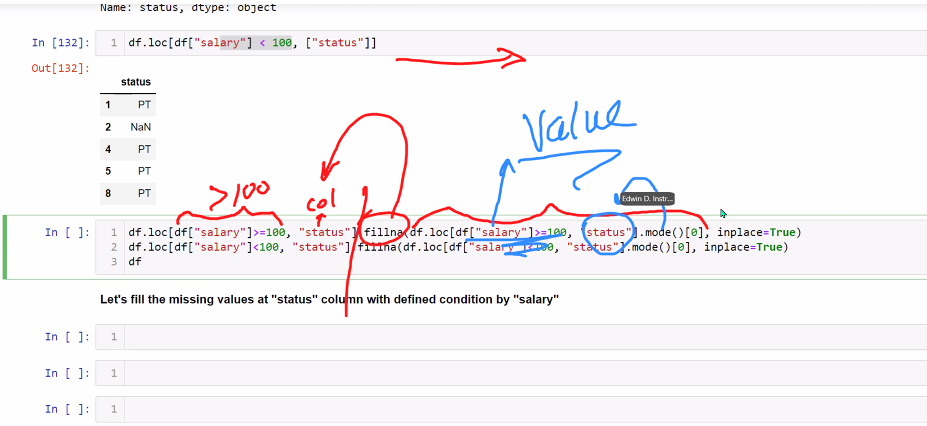

In [165]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54.0
2,P003,0,NaN,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,DS,1,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10,2.0,136.0
8,P009,0,PT,FS,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [167]:
df # bak değişemmiş olmadı şimdi

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54.0
2,P003,0,NaN,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,DS,1,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10,2.0,136.0
8,P009,0,PT,FS,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [ ]:
hemen satırları yeniden oluşturuyoruz atama yapıyoruz.

In [169]:
df.loc[df["salary"]>=100, "status"]=df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])

In [170]:
df.loc[df["salary"]<100, "status"]=df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])

In [171]:
df #değişti

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2,8.0,NaN
1,P002,1,PT,FS,3,NaN,54.0
2,P003,0,PT,AWS,5,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7,11.0,58.0
5,P006,1,PT,DS,1,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,FT,FS,10,2.0,136.0
8,P009,0,PT,FS,14,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [ ]:
#sondaki nan niye değişmedi..salary de nan olduğu için. her conditionda false olduğu için.

**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [174]:
df.groupby(["gender","dept"])["status"].apply(lambda x: x.mode()[0])

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [175]:
df.groupby(["gender","dept"])["status"].transform(lambda x: x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [177]:
df["trans_status"]=df.groupby(["gender","dept"])["status"].transform(lambda x: x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2,8.0,NaN,FT
1,P002,1,PT,FS,3,NaN,54.0,FT
2,P003,0,PT,AWS,5,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7,11.0,58.0,FT
5,P006,1,PT,DS,1,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10,2.0,136.0,FT
8,P009,0,PT,FS,14,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


In [180]:
df.status.fillna(df["trans_status"],inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2,8.0,NaN,FT
1,P002,1,PT,FS,3,NaN,54.0,FT
2,P003,0,PT,AWS,5,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7,11.0,58.0,FT
5,P006,1,PT,DS,1,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10,2.0,136.0,FT
8,P009,0,PT,FS,14,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [183]:
df.groupby("dept")[["salary"]].mean()

,salary
dept,
AWS,89.500000
DS,86.000000
FS,83.333333


In [184]:
df.groupby(["status","dept"])[["salary"]].mean()

salary
status dept        
FT     AWS    120.0
       DS     125.0
       FS     136.0
PT     AWS     59.0
       DS      66.5
       FS      57.0

In [185]:
df.groupby(["status","dept"])[["salary"]].transform("mean")

,salary
0,125.0
1,57.0
2,59.0
3,120.0
4,66.5
5,66.5
6,136.0
7,136.0
8,57.0
9,125.0


In [191]:
df["trans_salary"]=df.groupby(["status","dept"])[["salary"]].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_array,trans_salary
0,P001,0,FT,DS,2,8.0,125.0,FT,125.0,125.0
1,P002,1,PT,FS,3,NaN,54.0,FT,57.0,57.0
2,P003,0,PT,AWS,5,5.0,59.0,PT,59.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0,120.0
4,P005,0,PT,DS,7,11.0,58.0,FT,66.5,66.5
5,P006,1,PT,DS,1,NaN,75.0,FT,66.5,66.5
6,P007,0,FT,FS,NaN,NaN,136.0,FT,136.0,136.0
7,P008,1,FT,FS,10,2.0,136.0,FT,136.0,136.0
8,P009,0,PT,FS,14,3.0,60.0,FT,57.0,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0,125.0


In [192]:
df["salary"].fillna(df["trans_salary"],inplace=True)

In [193]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_array,trans_salary
0,P001,0,FT,DS,2,8.0,125.0,FT,125.0,125.0
1,P002,1,PT,FS,3,NaN,54.0,FT,57.0,57.0
2,P003,0,PT,AWS,5,5.0,59.0,PT,59.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0,120.0
4,P005,0,PT,DS,7,11.0,58.0,FT,66.5,66.5
5,P006,1,PT,DS,1,NaN,75.0,FT,66.5,66.5
6,P007,0,FT,FS,NaN,NaN,136.0,FT,136.0,136.0
7,P008,1,FT,FS,10,2.0,136.0,FT,136.0,136.0
8,P009,0,PT,FS,14,3.0,60.0,FT,57.0,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [ ]:
#eğer type hatası alırsak



### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [195]:
flights=sns.load_dataset("flights")

In [196]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [197]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

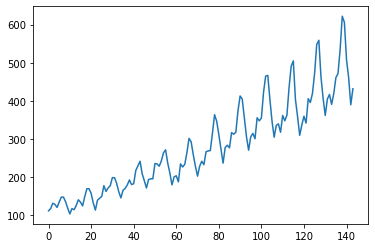

In [199]:
flights.passengers.plot();

In [200]:
flights_copy=flights.copy()

In [201]:
flights_copy

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [206]:
flights_copy.loc[np.random.randint(1,144,20),["passengers"]]

,passengers
34,146
113,435
131,405
125,472
80,312
28,172
15,135
135,461
39,181
127,559


In [207]:
flights_copy.loc[np.random.randint(1,144,20),["passengers"]]=np.nan
flights_copy

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,NaN
3,1949,Apr,129.0
4,1949,May,121.0
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,NaN
142,1960,Nov,390.0


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________